In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding  #CuDNNGRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
dataset = pd.read_csv('hepsiburada.csv')

In [3]:
dataset

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...
...,...,...
243492,1,fiyatına göre güzel
243493,1,Ürün kullanışlı iş görüyor fazlasıyla eşime al...
243494,1,"Hızlı Kargo, güzel ürün"
243495,1,telefon başarılı hızlı bir cihaz sadece beyaz...


In [4]:
target = dataset['Rating'].values.tolist()
data = dataset['Review'].values.tolist()

In [5]:
cutoff = int(len(data) * 0.8);
x_train, x_test = data[:cutoff], data[cutoff:]
y_train, y_test =  target[:cutoff], target[cutoff:]

In [6]:
x_train[500]

'ürün sipariş verdim 2 gün içinde elime ulaştı her zaman ki gibi kullanışlı bi ürün daha once de bu mouse dan almıştım.bu yüzden tereddütsüz aldım . alacak olanlara öneririm'

In [7]:
num_words = 10000

In [8]:
tokenizer = Tokenizer(num_words = num_words)

In [9]:
tokenizer.fit_on_texts(data)

In [10]:
tokenizer.word_index

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [11]:
x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)

In [12]:
x_train[500]

'ürün sipariş verdim 2 gün içinde elime ulaştı her zaman ki gibi kullanışlı bi ürün daha once de bu mouse dan almıştım.bu yüzden tereddütsüz aldım . alacak olanlara öneririm'

In [13]:
print(x_train_tokens[500])

[4, 57, 97, 26, 40, 112, 29, 47, 59, 130, 100, 20, 51, 63, 4, 11, 838, 18, 5, 587, 273, 157, 5, 369, 1396, 17, 303, 608, 381]


In [14]:
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]

In [15]:
np.mean(num_tokens)

20.744703220162876

In [16]:
np.max(num_tokens)

295

In [17]:
np.argmax(num_tokens)

21941

In [18]:
x_train[21941]

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

In [19]:
max_tokens = 60

In [20]:
num_tokens = np.array(num_tokens)

In [21]:
np.sum((num_tokens < max_tokens) / len(num_tokens))

0.9614697511673655

In [22]:
x_train_pad = pad_sequences(x_train_tokens, maxlen = 60)
x_test_pad = pad_sequences(x_test_tokens, maxlen = 60)

In [23]:
x_train_pad.shape

(194797, 60)

In [24]:
x_test_pad.shape

(48700, 60)

In [25]:
np.array(x_train_tokens[800])

array([  19,  341,   52,  194,   30,   54, 7992,   55,  209,  603, 7887,
          3,   36,  114,  164,  479,   85,    1, 1682,  782,   30,    2,
        380,  326,    3,    1,   81,  132,  562,    9,   10])

In [26]:
x_train_pad[800]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   19,  341,   52,  194,
         30,   54, 7992,   55,  209,  603, 7887,    3,   36,  114,  164,
        479,   85,    1, 1682,  782,   30,    2,  380,  326,    3,    1,
         81,  132,  562,    9,   10])

In [27]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(),idx.keys()))

In [28]:
def tokens_tostring(tokens):
    words = [inverse_map[token] for token in tokens if token != 0]
    text = ' '.join(words)
    return text

In [29]:
x_train[800]

'ürünü alalı 3 hafta kadar oldu. aralıksız kullanıyorum bilgisyarım sürekli açık durur ve ben günde yaklaşık 12 saat başındayım mousesu çok kullanırım. şimdiye kadar bir problem yaşamadım ve çok memnunum almak isteyenlere tavsiye ederim.'

In [30]:
tokens_tostring(x_train_tokens[800])

'ürünü alalı 3 hafta kadar oldu aralıksız kullanıyorum sürekli açık durur ve ben günde yaklaşık 12 saat çok kullanırım şimdiye kadar bir problem yaşamadım ve çok memnunum almak isteyenlere tavsiye ederim'

In [31]:
model = Sequential()

In [32]:
model.add(Embedding(input_dim = num_words,
                    output_dim = 50,
                    input_length = max_tokens,
                    name = 'embedding_Layer'))

In [33]:
model.add(GRU(units = 16, return_sequences = True))
model.add(GRU(units = 8, return_sequences = True))
model.add(GRU(units = 4))
model.add(Dense(1, activation = 'sigmoid'))

In [34]:
optimizer = Adam(lr = 1e-3)

In [35]:
model.compile(loss='binary_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy']   )

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_Layer (Embedding  (None, 60, 50)            500000    
 )                                                               
                                                                 
 gru (GRU)                   (None, 60, 16)            3264      
                                                                 
 gru_1 (GRU)                 (None, 60, 8)             624       
                                                                 
 gru_2 (GRU)                 (None, 4)                 168       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 504061 (1.92 MB)
Trainable params: 504061 (1.92 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [37]:
x_train_pad = np.array(x_train_pad)
y_train = np.array(y_train)

In [38]:
history = model.fit(x_train_pad, y_train, epochs = 10, batch_size = 256)

Epoch 1/10
761/761 [==============================] - 48s 57ms/step - loss: 0.2420 - accuracy: 0.9440
Epoch 2/10
761/761 [==============================] - 45s 58ms/step - loss: 0.1198 - accuracy: 0.9637
Epoch 3/10
761/761 [==============================] - 45s 59ms/step - loss: 0.0804 - accuracy: 0.9752
Epoch 4/10
761/761 [==============================] - 45s 59ms/step - loss: 0.0622 - accuracy: 0.9817
Epoch 5/10
761/761 [==============================] - 45s 59ms/step - loss: 0.0496 - accuracy: 0.9863
Epoch 6/10
761/761 [==============================] - 45s 59ms/step - loss: 0.0402 - accuracy: 0.9892
Epoch 7/10
761/761 [==============================] - 42s 55ms/step - loss: 0.0335 - accuracy: 0.9918
Epoch 8/10
761/761 [==============================] - 44s 58ms/step - loss: 0.0285 - accuracy: 0.9934
Epoch 9/10
761/761 [==============================] - 44s 58ms/step - loss: 0.0249 - accuracy: 0.9946
Epoch 10/10
761/761 [==============================] - 44s 58ms/step - loss: 0.022

In [39]:
model.save('model.h5')

C:\Users\Melek\anaconda3\envs\Duygu\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


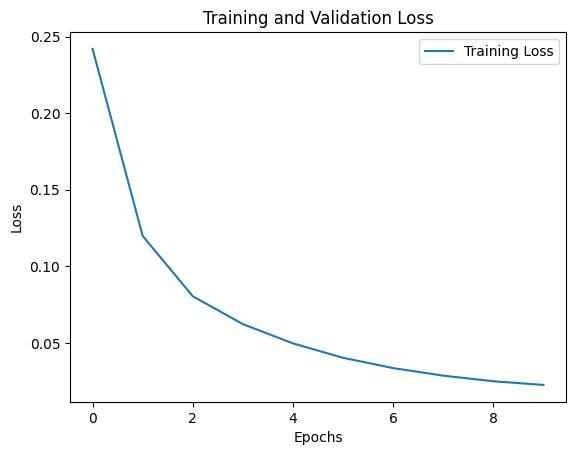

In [43]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kayıp grafiği
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

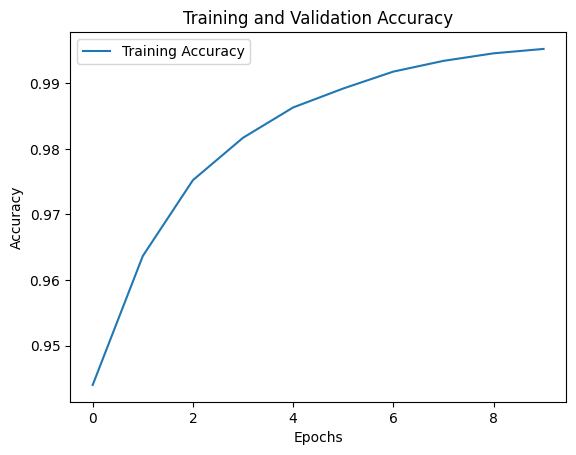

In [44]:
# Eğitim ve doğrulama doğruluk grafiği
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1522/1522 [==============================] - 14s 9ms/step


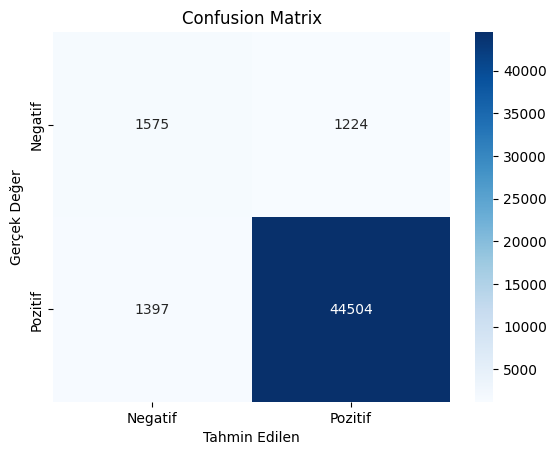

In [48]:
# Modelin test veri seti üzerinde tahminleri
y_pred_prob = model.predict(x_test_pad)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix'i seaborn kütüphanesi ile çiz
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Pozitif'],
            yticklabels=['Negatif', 'Pozitif'])
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

In [49]:
def predict_sentiment(sentence):
    # Tokenize edilen cümleyi modelin girdi boyutuna uygun hale getir
    sequence = tokenizer.texts_to_sequences([sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_tokens)
    
    # Modelin tahminini al
    prediction = model.predict(padded_sequence)[0][0]
    
    # Tahmin sonucuna göre olumlu veya olumsuz mesaj
    if prediction >= 0.5:
        return "Olumlu"
    else:
        return "Olumsuz"

In [51]:
# Kullanıcıdan bir cümle al
user_sentence = input("Analiz edilecek bir cümle girin: ")

# Tahmin yap ve sonucu yazdır
result = predict_sentiment(user_sentence)
print(f"Girilen cümle: {user_sentence}")
print(f"Tahmin: {result}")

Analiz edilecek bir cümle girin:  bedenler büyük ve kalitesi düşük


1/1 [==============================] - 0s 32ms/step
Girilen cümle: bedenler büyük ve kalitesi düşük
Tahmin: Olumsuz
